<a href="https://colab.research.google.com/github/Eskdagoat/5105/blob/main/AndrewNicola_801136465_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Problem 1a
##
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Load and preprocess the data
data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')
X = data.drop('price', axis=1)
y = data['price']

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)

#send tensors to gpu
X_train = X_train.cuda()
y_train = y_train.cuda()
X_val = X_val.cuda()
y_val = y_val.cuda()

# Define the neural network
class HousingNN(nn.Module):
    def __init__(self, input_size):
        super(HousingNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 8)  # Hidden layer with 8 nodes
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(8, 1)  # Output layer

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
model = HousingNN(input_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#send model to gpu
model = model.cuda()

# Training loop
num_epochs = 100
start_time = time.time()

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    # Training set predictions
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)

    # Validation set predictions
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs, y_val)

    # Calculate metrics for training set
    train_pred = train_outputs.cpu().numpy()
    train_true = y_train.cpu().numpy()
    train_r2 = 1 - np.sum((train_true - train_pred) ** 2) / np.sum((train_true - train_true.mean()) ** 2)
    train_mae = np.mean(np.abs(train_true - train_pred))
    train_rmse = np.sqrt(np.mean((train_true - train_pred) ** 2))

    # Calculate metrics for validation set
    val_pred = val_outputs.cpu().numpy()
    val_true = y_val.cpu().numpy()
    val_r2 = 1 - np.sum((val_true - val_pred) ** 2) / np.sum((val_true - val_true.mean()) ** 2)
    val_mae = np.mean(np.abs(val_true - val_pred))
    val_rmse = np.sqrt(np.mean((val_true - val_pred) ** 2))

print(f'\nTraining Time: {training_time:.2f} seconds')
print('\nTraining Set Metrics:')
print(f'MSE Loss: {train_loss.item():.4f}')
print(f'R-squared: {train_r2:.4f}')
print(f'MAE: {train_mae:.4f}')
print(f'RMSE: {train_rmse:.4f}')

print('\nValidation Set Metrics:')
print(f'MSE Loss: {val_loss.item():.4f}')
print(f'R-squared: {val_r2:.4f}')
print(f'MAE: {val_mae:.4f}')
print(f'RMSE: {val_rmse:.4f}')


Epoch [100/100], Loss: 0.2224

Training Time: 0.16 seconds

Training Set Metrics:
MSE Loss: 0.2221
R-squared: 0.7485
MAE: 0.3451
RMSE: 0.4712

Validation Set Metrics:
MSE Loss: 0.5022
R-squared: 0.6530
MAE: 0.5366
RMSE: 0.7087


Epoch [100/1000], Train Loss: 0.3456, Val Loss: 0.6410
Epoch [200/1000], Train Loss: 0.3202, Val Loss: 0.6077
Epoch [300/1000], Train Loss: 0.3227, Val Loss: 0.6685
Epoch [400/1000], Train Loss: 0.3312, Val Loss: 0.6294
Epoch [500/1000], Train Loss: 0.3008, Val Loss: 0.6562
Epoch [600/1000], Train Loss: 0.2801, Val Loss: 0.6677
Epoch [700/1000], Train Loss: 0.2949, Val Loss: 0.6924
Epoch [800/1000], Train Loss: 0.3428, Val Loss: 0.6616
Epoch [900/1000], Train Loss: 0.2892, Val Loss: 0.5963
Epoch [1000/1000], Train Loss: 0.2987, Val Loss: 0.5871

Training Time: 3.66 seconds

Training Set Metrics:
MSE Loss: 0.1699
R-squared: 0.8076
MAE: 0.3004
RMSE: 0.4122

Validation Set Metrics:
MSE Loss: 0.5443
R-squared: 0.6240
MAE: 0.5446
RMSE: 0.7377


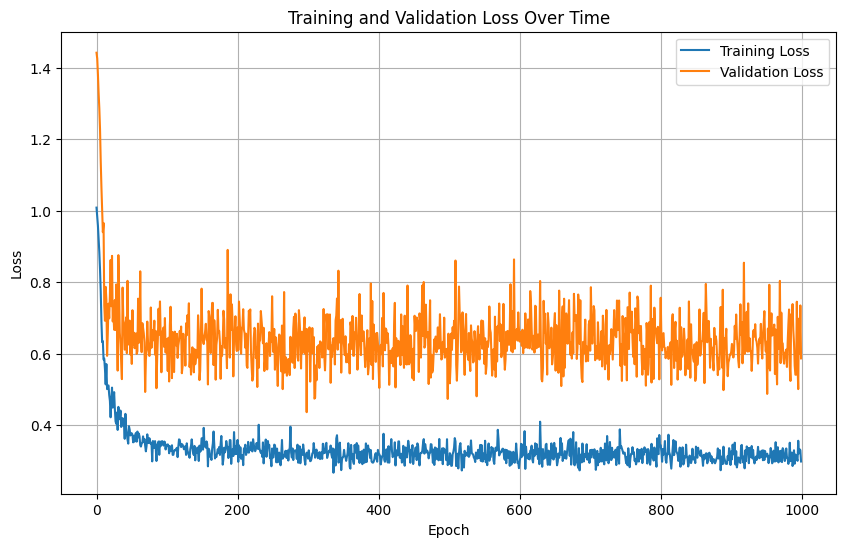

In [ ]:
## Problem 1b
##

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')
X = data.drop('price', axis=1)
y = data['price']

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)

#send tensors to gpu
X_train = X_train.cuda()
y_train = y_train.cuda()
X_val = X_val.cuda()
y_val = y_val.cuda()

# Define the neural network
class HousingNN(nn.Module):
    def __init__(self, input_size):
        super(HousingNN, self).__init__()
        # Layers
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.output_layer = nn.Linear(8, 1)  # No activation for regression output

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.output_layer(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
model = HousingNN(input_size)
criterion = nn.MSELoss()
# Add weight decay (L2 regularization) to the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

#send model to gpu
model = model.cuda()

# Before training loop, add lists to store losses
train_losses = []
val_losses = []

# Training loop
num_epochs = 1000
start_time = time.time()

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)

    # Calculate the main loss
    main_loss = criterion(outputs, y_train)

    # Add L2 regularization term
    l2_lambda = 0.01  # Regularization strength
    l2_reg = torch.tensor(0., requires_grad=True).cuda()
    for param in model.parameters():
        l2_reg = l2_reg + torch.norm(param, 2)

    # Combined loss with regularization
    loss = main_loss + l2_lambda * l2_reg

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate validation loss
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)

    # Store losses
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    # Training set predictions
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)

    # Validation set predictions
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs, y_val)

    # Calculate metrics for training set
    train_pred = train_outputs.cpu().numpy()
    train_true = y_train.cpu().numpy()
    train_r2 = 1 - np.sum((train_true - train_pred) ** 2) / np.sum((train_true - train_true.mean()) ** 2)
    train_mae = np.mean(np.abs(train_true - train_pred))
    train_rmse = np.sqrt(np.mean((train_true - train_pred) ** 2))

    # Calculate metrics for validation set
    val_pred = val_outputs.cpu().numpy()
    val_true = y_val.cpu().numpy()
    val_r2 = 1 - np.sum((val_true - val_pred) ** 2) / np.sum((val_true - val_true.mean()) ** 2)
    val_mae = np.mean(np.abs(val_true - val_pred))
    val_rmse = np.sqrt(np.mean((val_true - val_pred) ** 2))

print(f'\nTraining Time: {training_time:.2f} seconds')
print('\nTraining Set Metrics:')
print(f'MSE Loss: {train_loss.item():.4f}')
print(f'R-squared: {train_r2:.4f}')
print(f'MAE: {train_mae:.4f}')
print(f'RMSE: {train_rmse:.4f}')

print('\nValidation Set Metrics:')
print(f'MSE Loss: {val_loss.item():.4f}')
print(f'R-squared: {val_r2:.4f}')
print(f'MAE: {val_mae:.4f}')
print(f'RMSE: {val_rmse:.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#problem 2a
##

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import time

# Custom Dataset class
class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Neural Network class
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.layer2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create datasets and dataloaders
train_dataset = BreastCancerDataset(X_train_scaled, y_train)
val_dataset = BreastCancerDataset(X_val_scaled, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BinaryClassifier(input_size=30).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# Training
num_epochs = 1000
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    val_loss = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        val_loss += loss.item()

        predicted = (outputs.squeeze() > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct / total

print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {total_loss/len(train_loader):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import time

# Custom Dataset class
class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Neural Network class
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.layer2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create datasets and dataloaders
train_dataset = BreastCancerDataset(X_train_scaled, y_train)
val_dataset = BreastCancerDataset(X_val_scaled, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BinaryClassifier(input_size=30).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# Training
num_epochs = 100
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print progress every 10 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    val_loss = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        val_loss += loss.item()

        predicted = (outputs.squeeze() > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct / total

print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {total_loss/len(train_loader):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch [10/1000], Loss: 0.1284
Epoch [20/1000], Loss: 0.0716
Epoch [30/1000], Loss: 0.0569
Epoch [40/1000], Loss: 0.0460
Epoch [50/1000], Loss: 0.0421
Epoch [60/1000], Loss: 0.0367
Epoch [70/1000], Loss: 0.0302
Epoch [80/1000], Loss: 0.0278
Epoch [90/1000], Loss: 0.0226
Epoch [100/1000], Loss: 0.0189
Epoch [110/1000], Loss: 0.0160
Epoch [120/1000], Loss: 0.0141
Epoch [130/1000], Loss: 0.0122
Epoch [140/1000], Loss: 0.0126
Epoch [150/1000], Loss: 0.0088
Epoch [160/1000], Loss: 0.0082
Epoch [170/1000], Loss: 0.0068
Epoch [180/1000], Loss: 0.0062
Epoch [190/1000], Loss: 0.0052
Epoch [200/1000], Loss: 0.0046
Epoch [210/1000], Loss: 0.0042
Epoch [220/1000], Loss: 0.0037
Epoch [230/1000], Loss: 0.0033
Epoch [240/1000], Loss: 0.0029
Epoch [250/1000], Loss: 0.0027
Epoch [260/1000], Loss: 0.0024
Epoch [270/1000], Loss: 0.0023
Epoch [280/1000], Loss: 0.0035
Epoch [290/1000], Loss: 0.0017
Epoch [300/1000], Loss: 0.0015
Epoch [310/1000], Loss: 0.0014
Epoch [320/1000], Loss: 0.0013
Epoch [330/1000],

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import time

# Custom Dataset class
class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Updated Neural Network class
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.sigmoid(self.layer5(x))
        return x

# Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create datasets and dataloaders
train_dataset = BreastCancerDataset(X_train_scaled, y_train)
val_dataset = BreastCancerDataset(X_val_scaled, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BinaryClassifier(input_size=30).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# Training
num_epochs = 100
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    val_loss = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        val_loss += loss.item()

        predicted = (outputs.squeeze() > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct / total

print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {total_loss/len(train_loader):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch [10/100], Loss: 0.0612
Epoch [20/100], Loss: 0.0249
Epoch [30/100], Loss: 0.0124
Epoch [40/100], Loss: 0.0075
Epoch [50/100], Loss: 0.0047
Epoch [60/100], Loss: 0.0032
Epoch [70/100], Loss: 0.0025
Epoch [80/100], Loss: 0.0021
Epoch [90/100], Loss: 0.0018
Epoch [100/100], Loss: 0.0016

Training Time: 3.42 seconds
Final Training Loss: 0.0016
Validation Accuracy: 0.9825


In [ ]:
#problem 3a
##

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 256)  # First and only hidden layer
        self.bn1 = nn.BatchNorm1d(256)          # Batch normalization
        self.fc2 = nn.Linear(256, 10)           # Output layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Create separate transforms for training and testing
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                      download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                        shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                     download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                       shuffle=False, num_workers=2)

# Initialize the network and define loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
print(f"Training on {device}")
start_time = time.time()
losses = []

for epoch in range(100):
    net.train()  # Set network to training mode
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    losses.append(epoch_loss)

    # Evaluation phase
    net.eval()  # Set network to evaluation mode
    with torch.no_grad():
        correct = 0
        total = 0
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.3f}, Accuracy: {epoch_acc:.2f}%')

training_time = time.time() - start_time
print(f'Finished Training. Total time: {training_time:.2f} seconds')

# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('training_loss.png')
plt.close()

# Save results to a file
with open('results.txt', 'w') as f:
    f.write(f'Training time: {training_time:.2f} seconds\n')
    f.write(f'Final training loss: {losses[-1]:.4f}\n')
    f.write(f'Test accuracy: {accuracy:.2f}%\n')


100%|██████████| 170M/170M [00:13<00:00, 13.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training on cuda
Epoch 10, Loss: 1.366, Accuracy: 54.52%
Epoch 20, Loss: 1.285, Accuracy: 56.30%
Epoch 30, Loss: 1.247, Accuracy: 56.69%
Epoch 40, Loss: 1.205, Accuracy: 57.33%
Epoch 50, Loss: 1.192, Accuracy: 57.96%
Epoch 60, Loss: 1.168, Accuracy: 58.63%
Epoch 70, Loss: 1.154, Accuracy: 58.36%
Epoch 80, Loss: 1.145, Accuracy: 58.82%
Epoch 90, Loss: 1.123, Accuracy: 58.67%
Epoch 100, Loss: 1.117, Accuracy: 58.86%
Finished Training. Total time: 2395.03 seconds
Accuracy on test set: 58.86%


Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Epoch [1/100], Loss: 1.6417, Accuracy: 42.46%
Epoch [10/100], Loss: 0.9976, Accuracy: 65.80%
Epoch [20/100], Loss: 0.6693, Accuracy: 77.28%
Epoch [30/100], Loss: 0.4869, Accuracy: 83.57%
Epoch [40/100], Loss: 0.3687, Accuracy: 87.78%
Epoch [50/100], Loss: 0.2961, Accuracy: 90.44%
Epoch [60/100], Loss: 0.2519, Accuracy: 92.14%
Epoch [70/100], Loss: 0.2357, Accuracy: 92.86%
Epoch [80/100], Loss: 0.2297, Accuracy: 93.38%
Epoch [90/100], Loss: 0.1813, Accuracy: 94.71%
Epoch [100/100], Loss: 0.1484, Accuracy: 95.52%

Training Time: 172.59 seconds
Test Loss: 5.3871, Test Accuracy: 50.80%


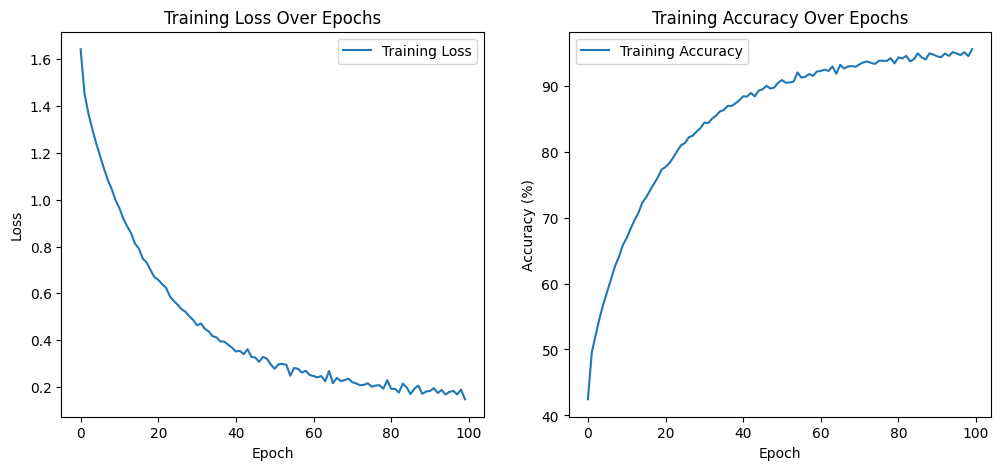

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt

# Check if GPU is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Lambda(lambda x: x.view(-1))
])

# Load datasets without DataLoader
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

# Prepare full training data and move to device
train_data = []
train_labels = []
for data, target in train_dataset:
    train_data.append(data)
    train_labels.append(target)

train_data = torch.stack(train_data).to(device)
train_labels = torch.tensor(train_labels, dtype=torch.long).to(device)

# Prepare full test data and move to device
test_data = []
test_labels = []
for data, target in test_dataset:
    test_data.append(data)
    test_labels.append(target)

test_data = torch.stack(test_data).to(device)
test_labels = torch.tensor(test_labels, dtype=torch.long).to(device)

# Create custom datasets
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

# Create DataLoaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Part a: One hidden layer network
class NetOneHiddenLayer(nn.Module):
    def __init__(self):
        super(NetOneHiddenLayer, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model and move it to the device
net = NetOneHiddenLayer().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training
num_epochs = 100
train_losses = []
train_accuracies = []
start_time = time.time()

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    net.train()
    for inputs, labels in train_loader:
        # Data is already on device, no need to transfer
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

end_time = time.time()
training_time = end_time - start_time
print(f'\nTraining Time: {training_time:.2f} seconds')

# Evaluation
net.eval()
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        # Data is already on device, no need to transfer
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_dataset)
test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()


Epoch [1/100], Loss: 1.7126, Accuracy: 39.15%
Epoch [10/100], Loss: 1.1430, Accuracy: 59.17%
Epoch [20/100], Loss: 0.9242, Accuracy: 66.76%
Epoch [30/100], Loss: 0.7824, Accuracy: 72.20%
Epoch [40/100], Loss: 0.6799, Accuracy: 75.89%
Epoch [50/100], Loss: 0.6189, Accuracy: 78.18%
Epoch [60/100], Loss: 0.5674, Accuracy: 80.27%
Epoch [70/100], Loss: 0.5218, Accuracy: 82.12%
Epoch [80/100], Loss: 0.4826, Accuracy: 83.38%
Epoch [90/100], Loss: 0.4620, Accuracy: 84.21%
Epoch [100/100], Loss: 0.4335, Accuracy: 85.23%

Extended Model Training Time: 237.97 seconds
Test Loss: 1.7560, Test Accuracy: 55.59%


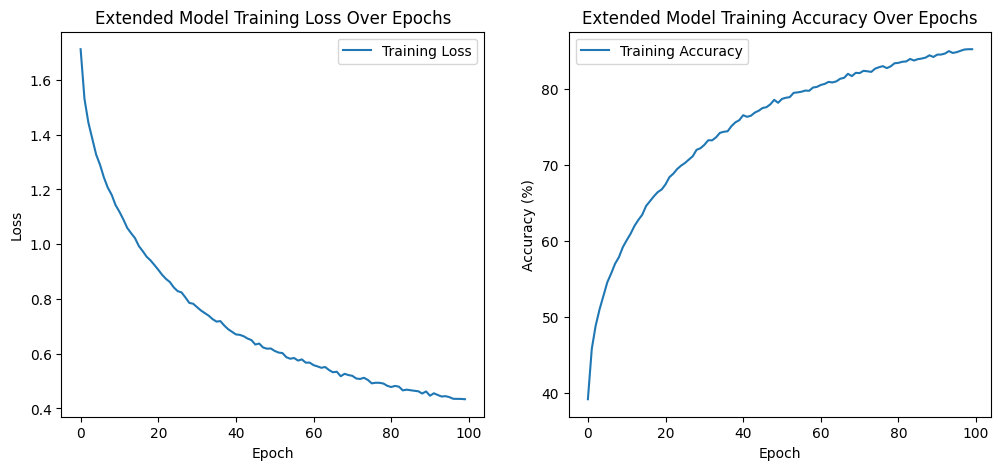

In [ ]:
class NetExtended(nn.Module):
    def __init__(self):
        super(NetExtended, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()

        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu3(x)

        x = self.fc4(x)
        return x

# Initialize the extended model and move it to the device
net_ext = NetExtended().to(device)
criterion_ext = nn.CrossEntropyLoss()
optimizer_ext = optim.Adam(net_ext.parameters(), lr=0.001)

# Training extended model
train_losses_ext = []
train_accuracies_ext = []
start_time_ext = time.time()

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    net_ext.train()
    for inputs, labels in train_loader:
        # Data is already on device, no need to transfer
        optimizer_ext.zero_grad()
        outputs = net_ext(inputs)
        loss = criterion_ext(outputs, labels)
        loss.backward()
        optimizer_ext.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = 100 * correct / total
    train_losses_ext.append(epoch_loss)
    train_accuracies_ext.append(epoch_acc)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

end_time_ext = time.time()
training_time_ext = end_time_ext - start_time_ext
print(f'\nExtended Model Training Time: {training_time_ext:.2f} seconds')

# Evaluation of extended model
net_ext.eval()
correct = 0
total = 0
test_loss_ext = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        # Data is already on device, no need to transfer
        outputs = net_ext(inputs)
        loss = criterion_ext(outputs, labels)
        test_loss_ext += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss_ext /= len(test_dataset)
test_accuracy_ext = 100 * correct / total
print(f'Test Loss: {test_loss_ext:.4f}, Test Accuracy: {test_accuracy_ext:.2f}%')

# Plot results of extended model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses_ext, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Extended Model Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies_ext, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Extended Model Training Accuracy Over Epochs')
plt.legend()
plt.show()
